# **Model Development**
Compare models based on accuracy and performance metrics like RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error).

# **Mount Google Drive**
Mount Google Drive to access files stored in 'MyDrive'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os

# List the files in MyDrive to check if the cleaned data file exists
print(os.listdir('/content/drive/MyDrive'))


Mounted at /content/drive
['Colab Notebooks', 'car_price_cleaned_data.csv']


# **Import Libraries**

In [ ]:
# Import the necessary libraries for data processing, modeling, and evaluation
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# **Load the cleaned data from Google Drive**

In [ ]:
# Step 2: Load the Cleaned Data
# Provide the correct path to your cleaned dataset
file_path = '/content/drive/MyDrive/car_price_cleaned_data.csv'  # Adjust path if necessary
cleaned_data = pd.read_csv(file_path)

# Verify the data
print("First few rows of the dataset:")
print(cleaned_data.head())
print("\nDataset Information:")
print(cleaned_data.info())

First few rows of the dataset:
   it      ft         bt        km transmission  ownerNo      oem  \
0   0  Petrol  Hatchback  120000.0       Manual        3   Maruti   
1   0  Petrol        SUV   32706.0       Manual        2     Ford   
2   0  Petrol  Hatchback   11949.0       Manual        1     Tata   
3   0  Petrol      Sedan   17794.0       Manual        1  Hyundai   
4   0  Diesel        SUV   60000.0       Manual        1   Maruti   

                model  modelYear  centralVariantId               variantName  \
0      Maruti Celerio       2015              3979                       VXI   
1       Ford Ecosport       2018              6087  1.5 Petrol Titanium BSIV   
2          Tata Tiago       2018              2983           1.2 Revotron XZ   
3       Hyundai Xcent       2014              1867        1.2 Kappa S Option   
4  Maruti SX4 S Cross       2015              4277             DDiS 200 Zeta   

      price  mileage  Seats  
0  400000.0    23.10    5.0  
1  811000.0  

# **Apply One-Hot Encoding**

In [ ]:
# Apply One-Hot Encoding for 'oem' (car brand), 'fuelType', 'carType', etc.
cleaned_data = pd.get_dummies(cleaned_data, columns=['oem', 'variantName','model','ft', 'bt', 'transmission'], drop_first=True)

# Verify the encoding
print(cleaned_data.head())

   it        km  ownerNo  modelYear  centralVariantId     price  mileage  \
0   0  120000.0        3       2015              3979  400000.0    23.10   
1   0   32706.0        2       2018              6087  811000.0    17.00   
2   0   11949.0        1       2018              2983  585000.0    23.84   
3   0   17794.0        1       2014              1867  462000.0    19.10   
4   0   60000.0        1       2015              4277  790000.0    23.65   

   Seats  oem_BMW  oem_Chevrolet  ...  ft_Petrol  bt_Coupe  bt_Hatchback  \
0    5.0    False          False  ...       True     False          True   
1    5.0    False          False  ...       True     False         False   
2    5.0    False          False  ...       True     False          True   
3    5.0    False          False  ...       True     False         False   
4    5.0    False          False  ...      False     False         False   

   bt_MUV  bt_Minivans  bt_Pickup Trucks  bt_SUV  bt_Sedan  bt_Wagon  \
0   False     

# **Step 3: Check Missing Values**

In [ ]:
# Drop rows with missing values (or use imputation if preferred)
cleaned_data = cleaned_data.dropna()

# Verify no missing values remain
print("\nMissing values in dataset:")
print(cleaned_data.isnull().sum())


Missing values in dataset:
it                     0
km                     0
ownerNo                0
modelYear              0
centralVariantId       0
                      ..
bt_Pickup Trucks       0
bt_SUV                 0
bt_Sedan               0
bt_Wagon               0
transmission_Manual    0
Length: 2122, dtype: int64


# **Prepare Data for Training**

In [ ]:
# Step 4: Separate Features and Target Variable
# The target variable is 'price', and the rest are features
X = cleaned_data.drop(columns=['price'])  # Features
y = cleaned_data['price']  # Target

# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (5825, 2121)
Testing data shape: (1457, 2121)


# **Initialize the models**

In [ ]:
# Step 6: Initialize the Models
linear_model = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
ridge_model = Ridge(alpha=1.0, random_state=42)
lasso_model = Lasso(alpha=0.1, random_state=42)

# **Train the models**

In [ ]:
# Step 7: Train the Models
linear_model.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.875e+13, tolerance: 7.025e+10



Lasso(alpha=0.1, random_state=42)

# **Make predictions on the test set**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 8: Make Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)  # Predictions for Ridge model
y_pred_lasso = lasso_model.predict(X_test)  # Predictions for Lasso model

# Step 9: Evaluate Model Performance
def evaluate_model(y_true, y_pred):
    """
    Evaluates a regression model using RMSE, MAE, and R² metrics.

    Parameters:
        y_true (array-like): True target values.
        y_pred (array-like): Predicted target values.

    Returns:
        rmse (float): Root Mean Squared Error.
        mae (float): Mean Absolute Error.
        r2 (float): R-squared score.
    """
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# Evaluate each model
rmse_linear, mae_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
rmse_rf, mae_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
rmse_gb, mae_gb, r2_gb = evaluate_model(y_test, y_pred_gb)
rmse_ridge, mae_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge)  # Evaluate Ridge model
rmse_lasso, mae_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso)  # Evaluate Lasso model

# Print evaluation results
print("\nModel Evaluation Results:")
print(f"Linear Regression - RMSE: {rmse_linear:.2f}, MAE: {mae_linear:.2f}, R²: {r2_linear:.2f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}, R²: {r2_rf:.2f}")
print(f"Gradient Boosting - RMSE: {rmse_gb:.2f}, MAE: {mae_gb:.2f}, R²: {r2_gb:.2f}")
print(f"Ridge Regression - RMSE: {rmse_ridge:.2f}, MAE: {mae_ridge:.2f}, R²: {r2_ridge:.2f}")
print(f"Lasso Regression - RMSE: {rmse_lasso:.2f}, MAE: {mae_lasso:.2f}, R²: {r2_lasso:.2f}")



Model Evaluation Results:
Linear Regression - RMSE: 134633.28, MAE: 89412.49, R²: 0.85
Random Forest - RMSE: 123358.37, MAE: 81523.61, R²: 0.87
Gradient Boosting - RMSE: 152059.35, MAE: 109097.02, R²: 0.81
Ridge Regression - RMSE: 124884.49, MAE: 83914.33, R²: 0.87
Lasso Regression - RMSE: 137531.53, MAE: 90069.53, R²: 0.84


# **Calculate RMSE and MAE for each model**

<ipython-input-88-904d28ee02c7>:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-88-904d28ee02c7>:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-88-904d28ee02c7>:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



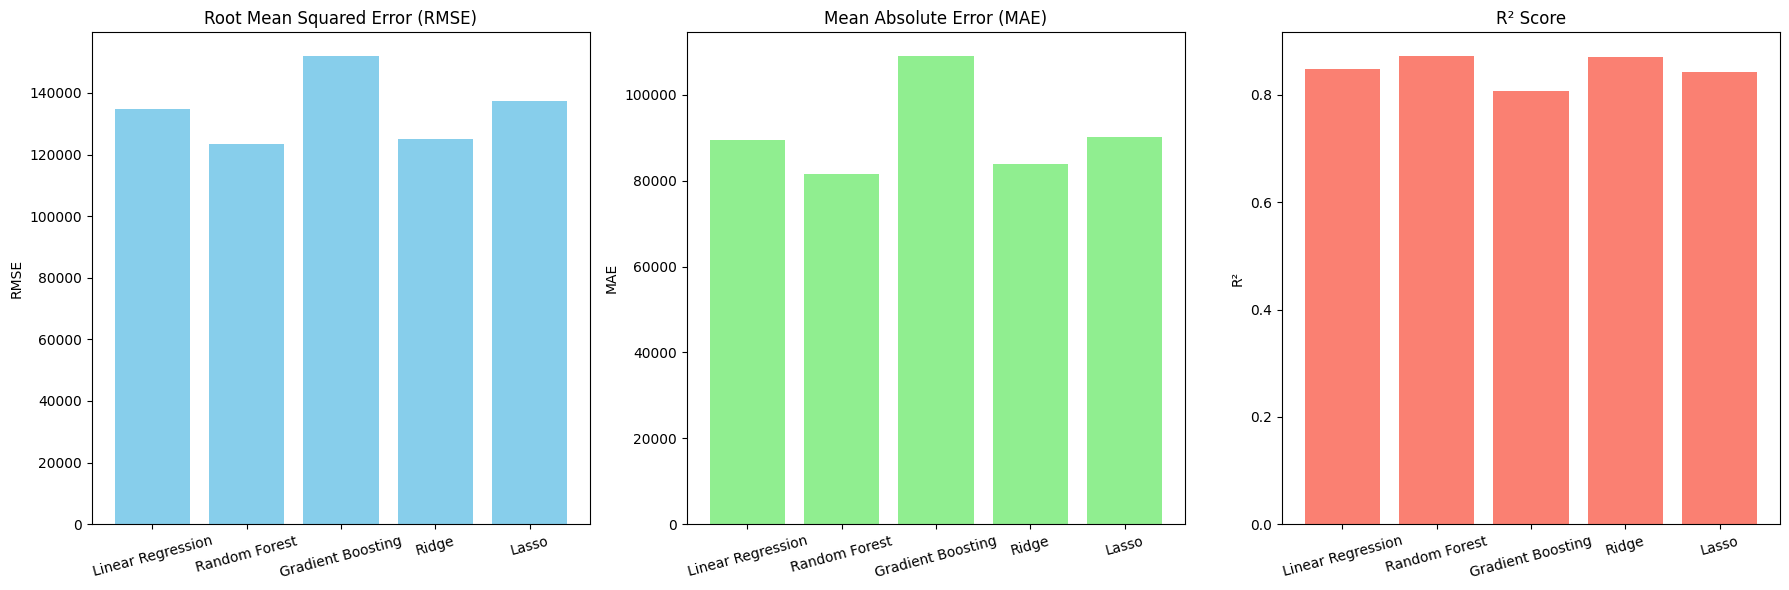

In [ ]:
# Step 10: Visualize Model Performance
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Ridge', 'Lasso']
rmse_values = [rmse_linear, rmse_rf, rmse_gb, rmse_ridge, rmse_lasso]
mae_values = [mae_linear, mae_rf, mae_gb, mae_ridge, mae_lasso]
r2_values = [r2_linear, r2_rf, r2_gb, r2_ridge, r2_lasso]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# RMSE Plot
ax[0].bar(models, rmse_values, color='skyblue')
ax[0].set_title('Root Mean Squared Error (RMSE)')
ax[0].set_ylabel('RMSE')
ax[0].set_xticklabels(models, rotation=15)  # Rotate labels for better readability

# MAE Plot
ax[1].bar(models, mae_values, color='lightgreen')
ax[1].set_title('Mean Absolute Error (MAE)')
ax[1].set_ylabel('MAE')
ax[1].set_xticklabels(models, rotation=15)  # Rotate labels for better readability

# R² Plot
ax[2].bar(models, r2_values, color='salmon')
ax[2].set_title('R² Score')
ax[2].set_ylabel('R²')
ax[2].set_xticklabels(models, rotation=15)  # Rotate labels for better readability

plt.tight_layout()
plt.show()


# **Mode Evalution and Testing**

In [ ]:
# Install Optuna
!pip install optuna

# Import necessary libraries
import optuna
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np


# **Fine-Tuning Random Forest**

## **Define the Objective Function**

In [ ]:
def random_forest_objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 300)  # Number of trees
    max_depth = trial.suggest_int('max_depth', 10, 40)         # Maximum depth of trees
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)  # Minimum samples to split
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)     # Minimum samples per leaf
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])  # Bootstrap samples

    # Define the model
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        random_state=42
    )

    # Perform cross-validation and return the negative RMSE
    rmse = -cross_val_score(
        rf_model, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1
    ).mean()

    return rmse


## **Run Bayesian Optimization with Optuna**

In [ ]:
# Create the study for Random Forest
rf_study = optuna.create_study(direction='minimize')  # Minimize RMSE
rf_study.optimize(random_forest_objective, n_trials=50, n_jobs=-1)  # Perform 50 trials

# Get the best parameters and RMSE
rf_best_params = rf_study.best_params
rf_best_rmse = rf_study.best_value

print("\nBest Random Forest Parameters:", rf_best_params)
print(f"Best Random Forest RMSE (Cross-Validation): {rf_best_rmse:.2f}")


[I 2024-12-29 07:11:41,961] A new study created in memory with name: no-name-54c4a107-d00b-4561-be9e-ade79d1a76a2
[I 2024-12-29 07:14:06,999] Trial 0 finished with value: 135313.30567619452 and parameters: {'n_estimators': 146, 'max_depth': 35, 'min_samples_split': 3, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 0 with value: 135313.30567619452.
[I 2024-12-29 07:14:30,191] Trial 1 finished with value: 162690.0101101054 and parameters: {'n_estimators': 185, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 0 with value: 135313.30567619452.
[I 2024-12-29 07:16:46,241] Trial 2 finished with value: 162694.68548027336 and parameters: {'n_estimators': 247, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 0 with value: 135313.30567619452.
[I 2024-12-29 07:18:08,053] Trial 3 finished with value: 162755.3036843084 and parameters: {'n_estimators': 210, 'max_depth': 40, 'min_samples_spli


Best Random Forest Parameters: {'n_estimators': 208, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}
Best Random Forest RMSE (Cross-Validation): 132867.32


## **Train the Final Model with the Best Hyperparameters**

In [ ]:
# Train the Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(
    n_estimators=rf_best_params['n_estimators'],
    max_depth=rf_best_params['max_depth'],
    min_samples_split=rf_best_params['min_samples_split'],
    min_samples_leaf=rf_best_params['min_samples_leaf'],
    bootstrap=rf_best_params['bootstrap'],
    random_state=42
)

# Fit the model on the full training dataset
best_rf_model.fit(X_train, y_train)

print("Tuned Random Forest model trained successfully!")


Tuned Random Forest model trained successfully!


# **Fine-Tuning Gradient Boosting**

## **Define the Objective Function**

In [ ]:
def gradient_boosting_objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 300)        # Number of boosting stages
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)  # Learning rate
    max_depth = trial.suggest_int('max_depth', 3, 15)                # Maximum depth of trees
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)  # Minimum samples to split
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)     # Minimum samples per leaf

    # Define the model
    gb_model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Perform cross-validation and return the negative RMSE
    rmse = -cross_val_score(
        gb_model, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1
    ).mean()

    return rmse


## **Run Bayesian Optimization with Optuna**

In [ ]:
# Create the study for Gradient Boosting
gb_study = optuna.create_study(direction='minimize')  # Minimize RMSE
gb_study.optimize(gradient_boosting_objective, n_trials=50, n_jobs=-1)  # Perform 50 trials

# Get the best parameters and RMSE
gb_best_params = gb_study.best_params
gb_best_rmse = gb_study.best_value

print("\nBest Gradient Boosting Parameters:", gb_best_params)
print(f"Best Gradient Boosting RMSE (Cross-Validation): {gb_best_rmse:.2f}")


[I 2024-12-29 08:14:28,800] A new study created in memory with name: no-name-dca8dbe7-dd42-4c68-9e89-e0d1f755c8d0
[I 2024-12-29 08:16:38,955] Trial 0 finished with value: 140907.56919452836 and parameters: {'n_estimators': 235, 'learning_rate': 0.02772808216542423, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 140907.56919452836.
[I 2024-12-29 08:16:43,903] Trial 1 finished with value: 138094.6496079703 and parameters: {'n_estimators': 88, 'learning_rate': 0.08975908514850384, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 1 with value: 138094.6496079703.
[I 2024-12-29 08:18:07,777] Trial 2 finished with value: 138397.07067470945 and parameters: {'n_estimators': 200, 'learning_rate': 0.040849402886662084, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 1 with value: 138094.6496079703.
[I 2024-12-29 08:19:19,393] Trial 3 finished with value: 128950.68937268673 and parameters: {'n_e


Best Gradient Boosting Parameters: {'n_estimators': 279, 'learning_rate': 0.137575146505522, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 1}
Best Gradient Boosting RMSE (Cross-Validation): 127368.37


## **Train the Final Model with the Best Hyperparameters**

In [ ]:
# Train the Gradient Boosting model with the best parameters
best_gb_model = GradientBoostingRegressor(
    n_estimators=gb_best_params['n_estimators'],
    learning_rate=gb_best_params['learning_rate'],
    max_depth=gb_best_params['max_depth'],
    min_samples_split=gb_best_params['min_samples_split'],
    min_samples_leaf=gb_best_params['min_samples_leaf'],
    random_state=42
)

# Fit the model on the full training dataset
best_gb_model.fit(X_train, y_train)

print("Tuned Gradient Boosting model trained successfully!")


Tuned Gradient Boosting model trained successfully!


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
import optuna
import numpy as np


# **Fine-Tuning Rigid Model**

## **Define the Objective Function**

In [ ]:
def ridge_objective(trial):
    """
    Objective function for optimizing Ridge Regression using Optuna.
    """
    # Suggest a value for alpha (regularization strength)
    alpha = trial.suggest_float('alpha', 1e-4, 100, log=True)  # Log scale for wide range

    # Define Ridge model
    ridge_model = Ridge(alpha=alpha, random_state=42)

    # Evaluate the model using 3-fold cross-validation (minimize negative RMSE)
    rmse = -cross_val_score(
        ridge_model, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1
    ).mean()

    return rmse


## **Run Bayesian Optimization with Optuna**

In [ ]:
# Create Optuna study for Ridge
ridge_study = optuna.create_study(direction='minimize')
ridge_study.optimize(ridge_objective, n_trials=50, n_jobs=-1)  # Perform 50 trials

# Get the best parameters and score
ridge_best_params = ridge_study.best_params
ridge_best_rmse = ridge_study.best_value

print("\nBest Ridge Parameters:", ridge_best_params)
print(f"Best Ridge RMSE (Cross-Validation): {ridge_best_rmse:.2f}")


[I 2024-12-29 09:47:09,785] A new study created in memory with name: no-name-3a8016bd-420c-49e3-bae3-c0f27664fd02
[I 2024-12-29 09:47:18,382] Trial 0 finished with value: 131241.72586364116 and parameters: {'alpha': 0.1861677894137585}. Best is trial 0 with value: 131241.72586364116.
[I 2024-12-29 09:47:18,484] Trial 1 finished with value: 141952.56806117235 and parameters: {'alpha': 0.0002447337654993371}. Best is trial 0 with value: 131241.72586364116.
[I 2024-12-29 09:47:23,983] Trial 2 finished with value: 136127.78594954463 and parameters: {'alpha': 0.014304197763324079}. Best is trial 0 with value: 131241.72586364116.
[I 2024-12-29 09:47:25,918] Trial 3 finished with value: 131865.6896353228 and parameters: {'alpha': 3.3704146031602633}. Best is trial 0 with value: 131241.72586364116.
[I 2024-12-29 09:47:29,608] Trial 4 finished with value: 133327.78120335005 and parameters: {'alpha': 0.07762951570168501}. Best is trial 0 with value: 131241.72586364116.
[I 2024-12-29 09:47:31,616


Best Ridge Parameters: {'alpha': 0.9148477536033683}
Best Ridge RMSE (Cross-Validation): 128155.90


## **Train the Final Model with the Best Hyperparameters**

In [ ]:
# Train Ridge model with the best parameters
best_ridge_model = Ridge(alpha=ridge_best_params['alpha'], random_state=42)
best_ridge_model.fit(X_train, y_train)

print("Tuned Ridge Regression model trained successfully!")


Tuned Ridge Regression model trained successfully!


# **Fine-Tuning Lasso Model**

## **Define the Objective Function**

In [ ]:
def lasso_objective(trial):
    """
    Objective function for optimizing Lasso Regression using Optuna.
    """
    # Suggest a value for alpha (regularization strength)
    alpha = trial.suggest_float('alpha', 1e-4, 100, log=True)  # Log scale for wide range

    # Define Lasso model
    lasso_model = Lasso(alpha=alpha, random_state=42)

    # Evaluate the model using 3-fold cross-validation (minimize negative RMSE)
    rmse = -cross_val_score(
        lasso_model, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1
    ).mean()

    return rmse


## **Run Bayesian Optimization with Optuna**

In [ ]:
# Create Optuna study for Lasso
lasso_study = optuna.create_study(direction='minimize')
lasso_study.optimize(lasso_objective, n_trials=50, n_jobs=-1)  # Perform 50 trials

# Get the best parameters and score
lasso_best_params = lasso_study.best_params
lasso_best_rmse = lasso_study.best_value

print("\nBest Lasso Parameters:", lasso_best_params)
print(f"Best Lasso RMSE (Cross-Validation): {lasso_best_rmse:.2f}")


[I 2024-12-29 10:13:58,884] A new study created in memory with name: no-name-684b0ba3-b60b-4248-9aaa-720eda069d4f
[I 2024-12-29 10:14:33,189] Trial 0 finished with value: 145909.99699004198 and parameters: {'alpha': 0.17438677626196605}. Best is trial 0 with value: 145909.99699004198.
[I 2024-12-29 10:14:58,235] Trial 1 finished with value: 159135.58134610814 and parameters: {'alpha': 0.020391027337770658}. Best is trial 0 with value: 145909.99699004198.
[I 2024-12-29 10:15:25,781] Trial 2 finished with value: 150534.9436022806 and parameters: {'alpha': 0.0928201493377004}. Best is trial 0 with value: 145909.99699004198.
[I 2024-12-29 10:15:41,359] Trial 3 finished with value: 128533.0110763723 and parameters: {'alpha': 58.700115022666225}. Best is trial 3 with value: 128533.0110763723.
[I 2024-12-29 10:16:17,896] Trial 4 finished with value: 161868.27324956402 and parameters: {'alpha': 0.004689424605258553}. Best is trial 3 with value: 128533.0110763723.
[I 2024-12-29 10:16:43,001] Tr


Best Lasso Parameters: {'alpha': 46.9311544364088}
Best Lasso RMSE (Cross-Validation): 128334.77


## **Train the Final Model with the Best Hyperparameters**

In [ ]:
# Train Lasso model with the best parameters
best_lasso_model = Lasso(alpha=lasso_best_params['alpha'], random_state=42)
best_lasso_model.fit(X_train, y_train)

print("Tuned Lasso Regression model trained successfully!")


Tuned Lasso Regression model trained successfully!


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.227e+13, tolerance: 7.025e+10
  model = cd_fast.enet_coordinate_descent(


# **Make predictions with tuned models**

In [ ]:
# Make predictions with tuned models

y_pred_rf_tuned = best_rf_model.predict(X_test)
y_pred_gb_tuned = best_gb_model.predict(X_test)
y_pred_ridge = best_ridge_model.predict(X_test)
y_pred_lasso = best_lasso_model.predict(X_test)



# Evaluate the fine-tuned models
rmse_rf_tuned, mae_rf_tuned, r2_rf_tuned = evaluate_model(y_test, y_pred_rf_tuned)
rmse_gb_tuned, mae_gb_tuned, r2_gb_tuned = evaluate_model(y_test, y_pred_gb_tuned)
rmse_ridge, mae_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge)
rmse_lasso, mae_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso)


print("\nFine-Tuned Model Evaluation Results:")
print(f"Tuned Random Forest - RMSE: {rmse_rf_tuned:.2f}, MAE: {mae_rf_tuned:.2f}, R²: {r2_rf_tuned:.2f}")
print(f"Tuned Gradient Boosting - RMSE: {rmse_gb_tuned:.2f}, MAE: {mae_gb_tuned:.2f}, R²: {r2_gb_tuned:.2f}")
print(f"Tuned Ridge Regression - RMSE: {rmse_ridge:.2f}, MAE: {mae_ridge:.2f}, R2: {r2_ridge:.2f}")
print(f"Tuned Lasso Regression - RMSE: {rmse_lasso:.2f}, MAE: {mae_lasso:.2f}, R2: {r2_lasso:.2f}")


Fine-Tuned Model Evaluation Results:
Tuned Random Forest - RMSE: 122866.61, MAE: 81224.68, R²: 0.87
Tuned Gradient Boosting - RMSE: 121626.05, MAE: 83677.73, R²: 0.88
Tuned Ridge Regression - RMSE: 124889.70, MAE: 83849.52, R2: 0.87
Tuned Lasso Regression - RMSE: 126868.83, MAE: 85986.72, R2: 0.87


# **Data for comparison**

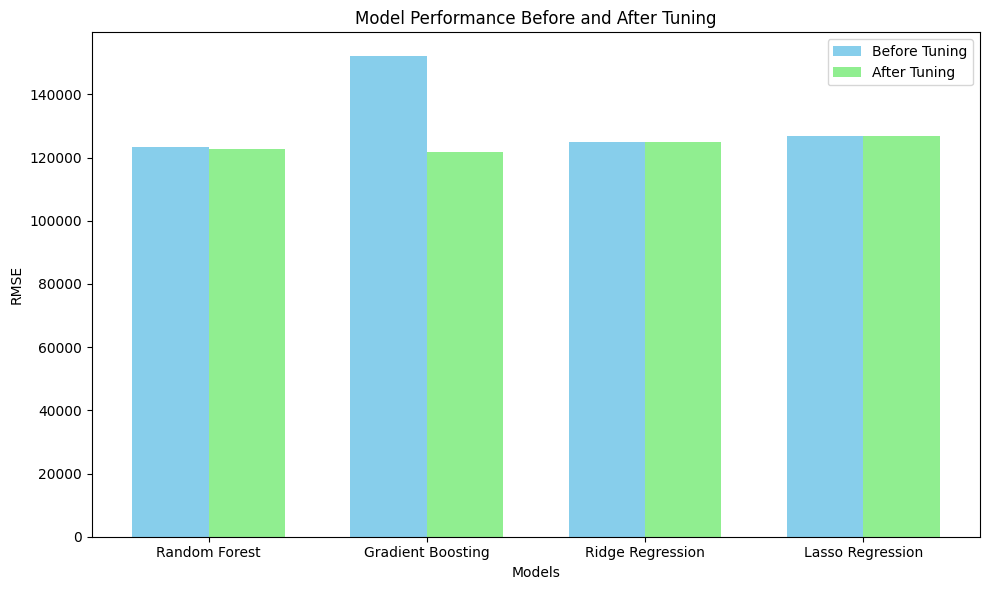

In [ ]:
# Data for comparison
models = ['Random Forest', 'Gradient Boosting', 'Ridge Regression', 'Lasso Regression']
rmse_before = [rmse_rf, rmse_gb, rmse_ridge, rmse_lasso]   # RMSE before tuning
rmse_after = [rmse_rf_tuned, rmse_gb_tuned, rmse_ridge, rmse_lasso]  # RMSE after tuning

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(models))

# Bar plots for RMSE before and after tuning
bar1 = ax.bar(index, rmse_before, bar_width, label='Before Tuning', color='skyblue')
bar2 = ax.bar(index + bar_width, rmse_after, bar_width, label='After Tuning', color='lightgreen')

ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('Model Performance Before and After Tuning')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


# **Visualize the Optuna Optimization Process**

In [ ]:
import optuna.visualization as vis

# Plot optimization history
vis.plot_optimization_history(gb_study).show()

# Plot hyperparameter importance
vis.plot_param_importances(gb_study).show()


# **Store models and their performance**

In [ ]:
# Example: Store models and their performance
model_scores = {
    'Random Forest': {'model': best_rf_model, 'rmse': rf_best_rmse},
    'Gradient Boosting': {'model': best_gb_model, 'rmse': gb_best_rmse},
    'Ridge': {'model': best_ridge_model, 'rmse': ridge_best_rmse},
    'Lasso': {'model': best_lasso_model, 'rmse': lasso_best_rmse}
}

# Automatically identify the best model based on RMSE
best_model_name = min(model_scores, key=lambda x: model_scores[x]['rmse'])
best_model = model_scores[best_model_name]['model']

print(f"Best Model: {best_model_name} with RMSE: {model_scores[best_model_name]['rmse']:.2f}")


Best Model: Gradient Boosting with RMSE: 127368.37


# **Price Forecasting:**

In [ ]:
# Create a new dataset simulating older cars
aging_cars = cleaned_data.copy()
aging_cars['modelYear'] -= 5  # Decrease modelYear by 5 years
aging_cars['modelYear'] = aging_cars['modelYear'].apply(lambda x: max(x, 2000))  # Keep modelYear realistic

print("Scenario 1: Aging Cars (Model Year Reduced by 5)")
print(aging_cars[['modelYear']].head())


Scenario 1: Aging Cars (Model Year Reduced by 5)
   modelYear
0       2010
1       2013
2       2013
3       2009
4       2010


# **Create a new dataset simulating increased mileage**

In [ ]:
increased_mileage = cleaned_data.copy()
increased_mileage['mileage'] += 50000  # Add 50,000 km to the mileage

print("Scenario 2: Increased Mileage (Mileage Increased by 50,000 km)")
print(increased_mileage[['mileage']].head())

Scenario 2: Increased Mileage (Mileage Increased by 50,000 km)
    mileage
0  50023.10
1  50017.00
2  50023.84
3  50019.10
4  50023.65


# **Combined Both Scenarios**

In [ ]:
combined_scenario = cleaned_data.copy()
combined_scenario['modelYear'] -= 5
combined_scenario['mileage'] += 50000
combined_scenario['modelYear'] = combined_scenario['modelYear'].apply(lambda x: max(x, 2000))


In [ ]:
# Define 'fuel_transmission_change' if it represents another scenario
fuel_transmission_change = cleaned_data.copy()

# Example transformation (if applicable)
fuel_transmission_change['fuelType'] = 'Diesel'  # Hypothetical change
fuel_transmission_change['transmission'] = 'Manual'  # Hypothetical change

# Print columns to verify
print("Columns in 'fuel_transmission_change':")
print(fuel_transmission_change.columns)

Columns in 'fuel_transmission_change':
Index(['it', 'km', 'ownerNo', 'modelYear', 'centralVariantId', 'price',
       'mileage', 'Seats', 'oem_BMW', 'oem_Chevrolet',
       ...
       'bt_Hatchback', 'bt_MUV', 'bt_Minivans', 'bt_Pickup Trucks', 'bt_SUV',
       'bt_Sedan', 'bt_Wagon', 'transmission_Manual', 'fuelType',
       'transmission'],
      dtype='object', length=2124)


In [ ]:
# Ensure required columns exist
if 'fuelType' not in fuel_transmission_change.columns:
    print("'fuelType' column is missing. Adding it with default values.")
    fuel_transmission_change['fuelType'] = 'default_fuel'  # Replace with relevant values

if 'transmission' not in fuel_transmission_change.columns:
    print("'transmission' column is missing. Adding it with default values.")
    fuel_transmission_change['transmission'] = 'default_transmission'  # Replace with relevant values

# ---- Function for Alignment and Prediction ----
def align_and_predict(data, model, required_features):
    # Ensure the dataset matches the model's training features
    for col in required_features:
        if col not in data.columns:
            data[col] = 0  # Add default value
    data = data[required_features]
    return model.predict(data)

# Predict prices for each scenario
trained_features = best_model.feature_names_in_  # Features used in model training
aging_cars['predicted_price'] = align_and_predict(aging_cars, best_model, trained_features)
increased_mileage['predicted_price'] = align_and_predict(increased_mileage, best_model, trained_features)
combined_scenario['predicted_price'] = align_and_predict(combined_scenario, best_model, trained_features)
fuel_transmission_change['predicted_price'] = align_and_predict(fuel_transmission_change, best_model, trained_features)


# **Display Result**

In [ ]:
# ---- Display Results ----
print("\nAging Cars Predicted Prices:")
print(aging_cars[['modelYear', 'predicted_price']].head())

print("\nIncreased Mileage Predicted Prices:")
print(increased_mileage[['mileage', 'predicted_price']].head())

print("\nCombined Scenario Predicted Prices:")
print(combined_scenario[['modelYear', 'mileage', 'predicted_price']].head())

print("\nFuel Type and Transmission Change Predicted Prices:")
available_columns = [col for col in ['fuelType', 'transmission', 'predicted_price'] if col in fuel_transmission_change.columns]
print(fuel_transmission_change[available_columns].head())


Aging Cars Predicted Prices:
   modelYear  predicted_price
0       2010    150290.563603
1       2013    537980.446982
2       2013    269845.928681
3       2009    220150.010156
4       2010    529081.494928

Increased Mileage Predicted Prices:
   mileage  predicted_price
0    23.10    177187.044297
1    17.00    502081.141937
2    23.84    259374.366020
3    19.10    207336.625195
4    23.65    506426.883624

Combined Scenario Predicted Prices:
   modelYear   mileage  predicted_price
0       2010  50023.10    148309.943967
1       2013  50017.00    516815.403275
2       2013  50023.84    267865.309045
3       2009  50019.10    218169.390520
4       2010  50023.65    527100.875292

Fuel Type and Transmission Change Predicted Prices:
  fuelType transmission  predicted_price
0   Diesel       Manual    300026.884968
1   Diesel       Manual    734347.132361
2   Diesel       Manual    450619.446746
3   Diesel       Manual    390814.100719
4   Diesel       Manual    677862.796777


In [ ]:
# Ensure required columns exist in aging_cars
if 'fuelType' not in aging_cars.columns:
    print("'fuelType' column missing. Adding default value.")
    aging_cars['fuelType'] = 'Petrol'  # Replace with relevant value.

if 'bodyType' not in aging_cars.columns:
    print("'bodyType' column missing. Adding default value.")
    aging_cars['bodyType'] = 'Hatchback'  # Replace with relevant value.

if 'transmission' not in aging_cars.columns:
    print("'transmission' column missing. Adding default value.")
    aging_cars['transmission'] = 'Manual'  # Replace with relevant value.

# Apply the function
forecast_years = [2025, 2030, 2035]
grouped_forecasts = forecast_by_car_type(aging_cars, 'modelYear', forecast_years, best_model)

# Example: Display results for one car type
for car_type, forecast in grouped_forecasts.items():
    print(f"\nForecast for {car_type}:\n", forecast)


'fuelType' column missing. Adding default value.
'bodyType' column missing. Adding default value.
'transmission' column missing. Adding default value.
Forecasting for car type: ('Petrol', 'Hatchback', 'Manual')

Forecast for ('Petrol', 'Hatchback', 'Manual'):
    modelYear  Forecasted Price
0       2025     520099.817183
1       2030     920552.322869
2       2035     609195.040882


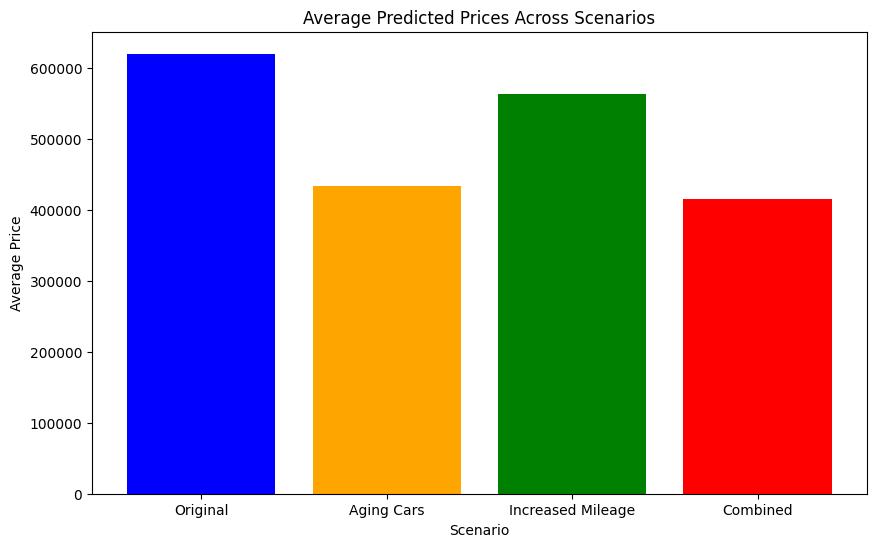

In [ ]:

# Combine average predicted prices across scenarios
scenarios = ['Original', 'Aging Cars', 'Increased Mileage', 'Combined']
average_prices = [
    cleaned_data['price'].mean(),  # Original average price
    aging_cars['predicted_price'].mean(),
    increased_mileage['predicted_price'].mean(),
    combined_scenario['predicted_price'].mean()
]

# Plot average prices for each scenario
plt.figure(figsize=(10, 6))
plt.bar(scenarios, average_prices, color=['blue', 'orange', 'green', 'red'])
plt.title('Average Predicted Prices Across Scenarios')
plt.ylabel('Average Price')
plt.xlabel('Scenario')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import numpy as np

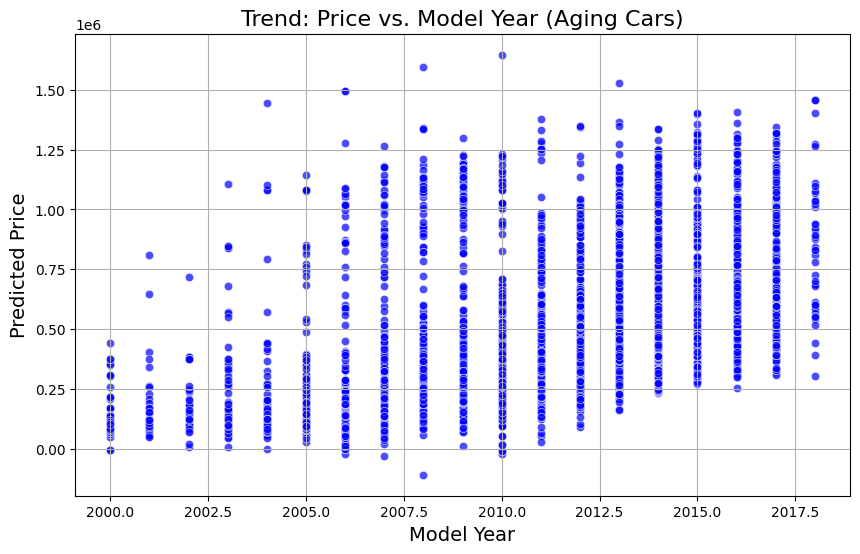

In [ ]:
# ---- 1. Trend: Price vs. Model Year (Aging Cars) ----
plt.figure(figsize=(10, 6))
sns.scatterplot(data=aging_cars, x='modelYear', y='predicted_price', color='blue', alpha=0.7)
plt.title("Trend: Price vs. Model Year (Aging Cars)", fontsize=16)
plt.xlabel("Model Year", fontsize=14)
plt.ylabel("Predicted Price", fontsize=14)
plt.grid()
plt.show()

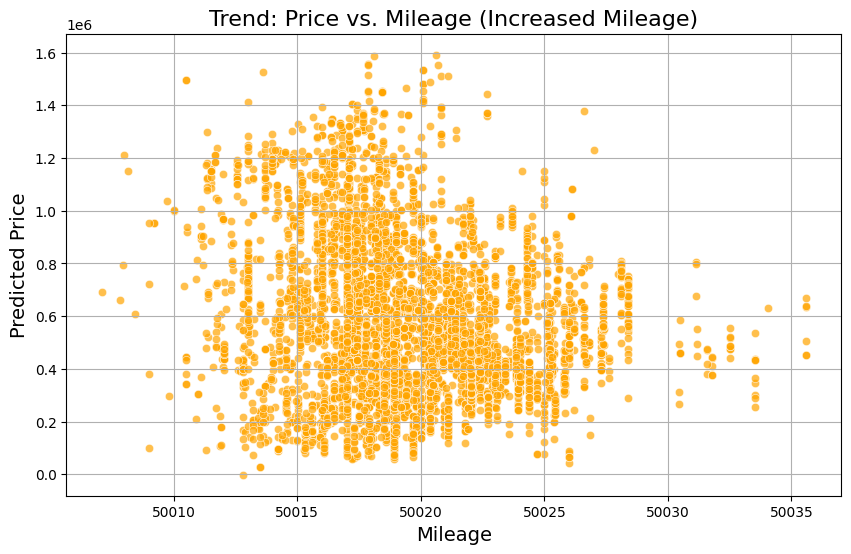

In [ ]:
# ---- 2. Trend: Price vs. Mileage (Increased Mileage) ----
plt.figure(figsize=(10, 6))
sns.scatterplot(data=increased_mileage, x='mileage', y='predicted_price', color='orange', alpha=0.7)
plt.title("Trend: Price vs. Mileage (Increased Mileage)", fontsize=16)
plt.xlabel("Mileage", fontsize=14)
plt.ylabel("Predicted Price", fontsize=14)
plt.grid()
plt.show()

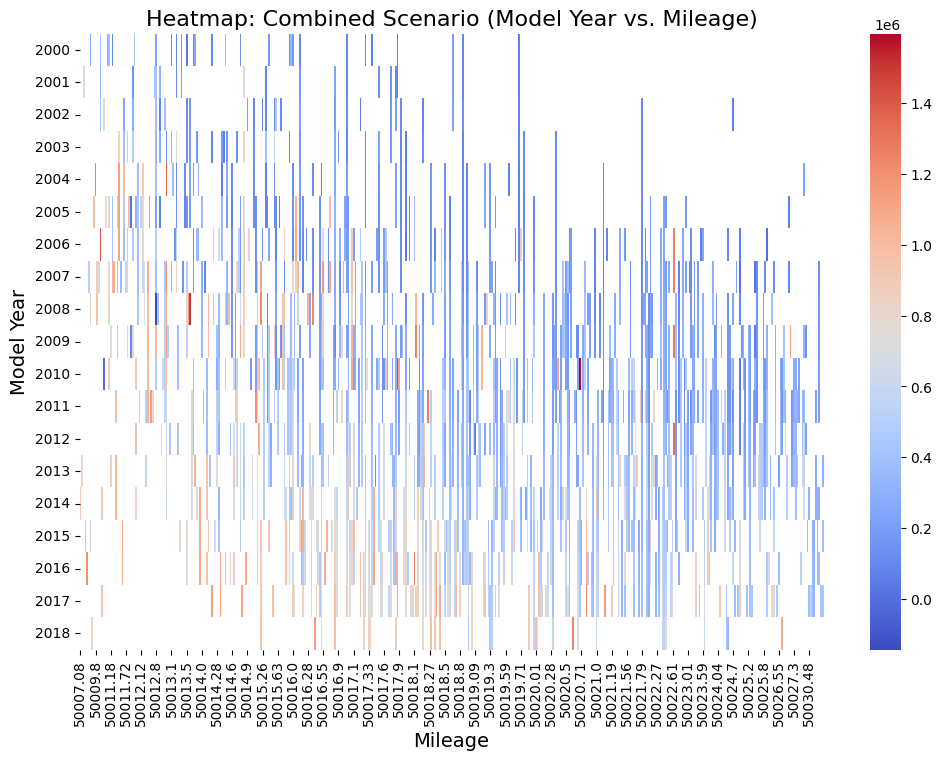

In [ ]:
# ---- 3. Combined Scenarios (Heatmap) ----
plt.figure(figsize=(12, 8))
heatmap_data = combined_scenario.pivot_table(index='modelYear', columns='mileage', values='predicted_price')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, cbar=True)
plt.title("Heatmap: Combined Scenario (Model Year vs. Mileage)", fontsize=16)
plt.xlabel("Mileage", fontsize=14)
plt.ylabel("Model Year", fontsize=14)
plt.show()

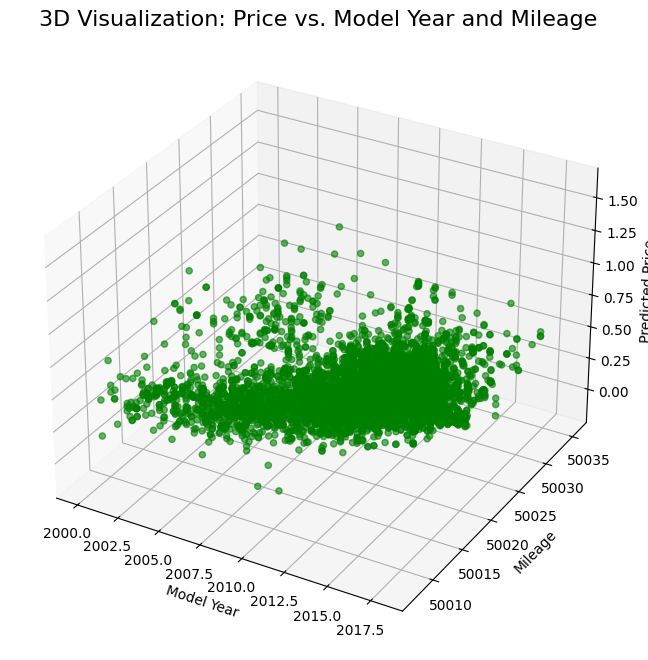

In [ ]:
# ---- 4. 3D Visualization ----
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_scenario['modelYear'], combined_scenario['mileage'], combined_scenario['predicted_price'], c='green', alpha=0.6)
ax.set_title("3D Visualization: Price vs. Model Year and Mileage", fontsize=16)
ax.set_xlabel("Model Year")
ax.set_ylabel("Mileage")
ax.set_zlabel("Predicted Price")
plt.show()

In [ ]:
# ---- Enhanced 3D Visualization (Plotly) ----
fig = px.scatter_3d(
    combined_scenario,
    x='modelYear',
    y='mileage',
    z='predicted_price',
    color='predicted_price',
    title="Enhanced 3D Visualization: Price vs. Model Year and Mileage",
    labels={"modelYear": "Model Year", "mileage": "Mileage", "predicted_price": "Predicted Price"},
    opacity=0.8
)
fig.show()

In [ ]:
# ---- 5. Compare Average Prices Across Car Types ----
if 'carType' in cleaned_data.columns:  # Ensure 'carType' column exists
    avg_prices_by_type = cleaned_data.groupby('carType')['predicted_price'].mean().sort_values()
    plt.figure(figsize=(10, 6))
    avg_prices_by_type.plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title("Comparison: Average Prices Across Car Types", fontsize=16)
    plt.xlabel("Car Type", fontsize=14)
    plt.ylabel("Average Predicted Price", fontsize=14)
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.show()

Forecasted Prices for Aging Cars:
   modelYear  Forecasted Price
0       2025     520099.817183
1       2030     920552.322869
2       2035     609195.040882


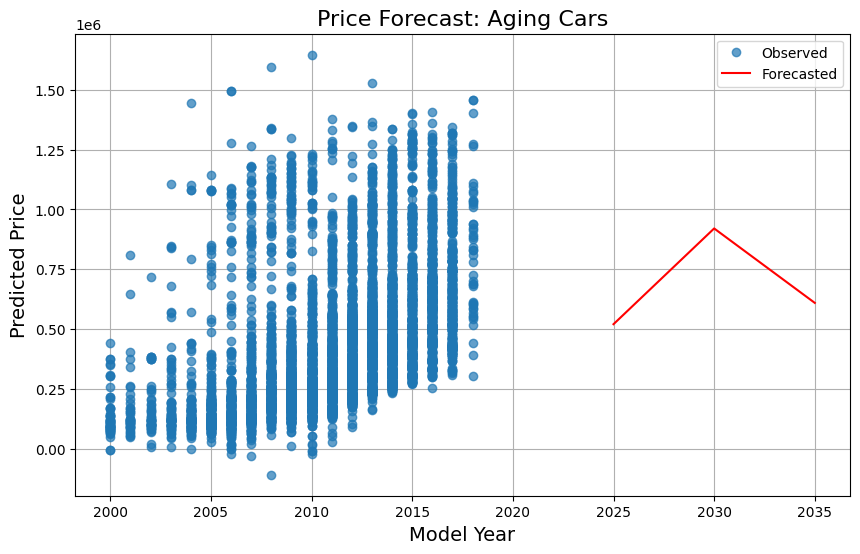

In [ ]:
# ---- 6. Forecast Future Prices for Specific Scenarios ----

# Forecasting function using the best model
def forecast_prices_with_best_model(best_model, feature_name, forecast_values, existing_data):
    """
    Forecast prices for future values of a specific feature using the trained model.

    Parameters:
    - best_model: Trained model (e.g., Random Forest, Gradient Boosting).
    - feature_name: Feature to use for forecasting (e.g., 'modelYear').
    - forecast_values: List of future values for the feature.
    - existing_data: Original dataset to use for alignment with model features.

    Returns:
    - DataFrame with forecasted values.
    """
    # Create a copy of the existing data for alignment
    forecast_data = existing_data.copy()

    # Assign future values to the feature (e.g., 'modelYear')
    forecast_data = forecast_data.iloc[:len(forecast_values)].copy()
    forecast_data[feature_name] = forecast_values

    # Ensure alignment with model features
    features_for_prediction = forecast_data[best_model.feature_names_in_]

    # Predict future prices
    predictions = best_model.predict(features_for_prediction)
    return pd.DataFrame({feature_name: forecast_values, 'Forecasted Price': predictions})


# Forecasting for aging cars using the best model
forecast_years = [2025, 2030, 2035]  # Future years to forecast
forecasted_prices = forecast_prices_with_best_model(
    best_model=best_model,
    feature_name='modelYear',
    forecast_values=forecast_years,
    existing_data=aging_cars
)

# Display forecasted prices
print("Forecasted Prices for Aging Cars:")
print(forecasted_prices)

# Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(aging_cars['modelYear'], aging_cars['predicted_price'], 'o', label='Observed', alpha=0.7)
plt.plot(forecasted_prices['modelYear'], forecasted_prices['Forecasted Price'], 'r-', label='Forecasted')
plt.title("Price Forecast: Aging Cars", fontsize=16)
plt.xlabel("Model Year", fontsize=14)
plt.ylabel("Predicted Price", fontsize=14)
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Scenario 1: Aging Cars (Reduce modelYear by 5)
aging_cars_forecast = forecast_prices_with_best_model(
    best_model=best_model,
    feature_name='modelYear',
    forecast_values=forecast_years,
    existing_data=aging_cars
)

# Scenario 2: Increased Mileage (Add 50,000 km)
increased_mileage = aging_cars.copy()
increased_mileage['km'] += 50000
increased_mileage_forecast = forecast_prices_with_best_model(
    best_model=best_model,
    feature_name='modelYear',
    forecast_values=forecast_years,
    existing_data=increased_mileage
)

# Compare the forecasts
print("\nAging Cars Forecast:")
print(aging_cars_forecast)

print("\nIncreased Mileage Forecast:")
print(increased_mileage_forecast)



Aging Cars Forecast:
   modelYear  Forecasted Price
0       2025     520099.817183
1       2030     920552.322869
2       2035     609195.040882

Increased Mileage Forecast:
   modelYear  Forecasted Price
0       2025     546996.297877
1       2030     884653.017824
2       2035     598723.478222


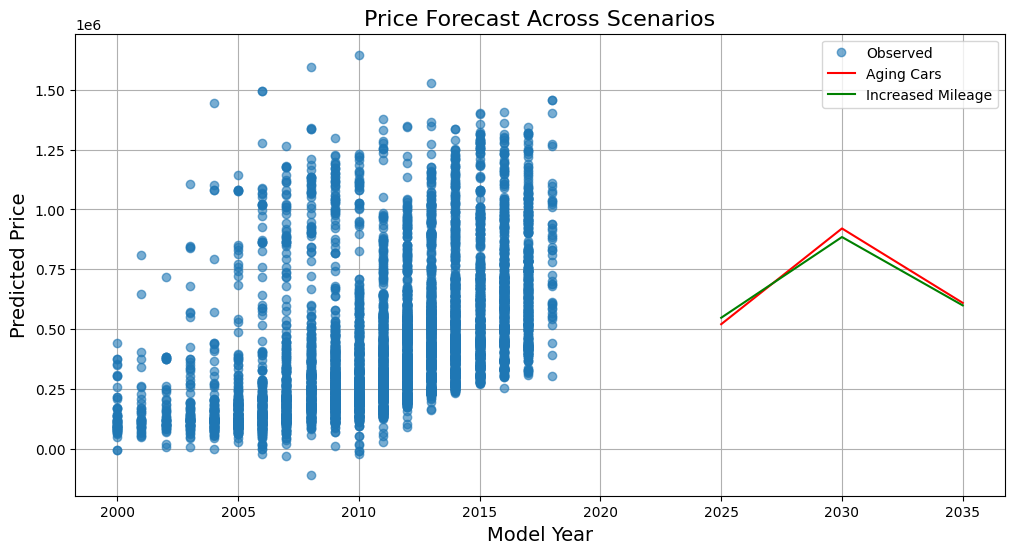

In [ ]:
# Visualize comparisons
plt.figure(figsize=(12, 6))

# Plot observed data
plt.plot(aging_cars['modelYear'], aging_cars['predicted_price'], 'o', label='Observed', alpha=0.6)

# Plot forecasted prices for aging cars
plt.plot(aging_cars_forecast['modelYear'], aging_cars_forecast['Forecasted Price'], 'r-', label='Aging Cars')

# Plot forecasted prices for increased mileage
plt.plot(increased_mileage_forecast['modelYear'], increased_mileage_forecast['Forecasted Price'], 'g-', label='Increased Mileage')

# Add labels and legend
plt.title("Price Forecast Across Scenarios", fontsize=16)
plt.xlabel("Model Year", fontsize=14)
plt.ylabel("Predicted Price", fontsize=14)
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Merge forecasts for comparison
comparison = pd.DataFrame({
    'Year': forecast_years,
    'Aging Cars': aging_cars_forecast['Forecasted Price'],
    'Increased Mileage': increased_mileage_forecast['Forecasted Price']
})

# Calculate percentage change
comparison['Change (%)'] = ((comparison['Increased Mileage'] - comparison['Aging Cars']) / comparison['Aging Cars']) * 100

# Display comparison
print("\nComparison of Forecasts with Percentage Change:")
print(comparison)



Comparison of Forecasts with Percentage Change:
   Year     Aging Cars  Increased Mileage  Change (%)
0  2025  520099.817183      546996.297877    5.171407
1  2030  920552.322869      884653.017824   -3.899757
2  2035  609195.040882      598723.478222   -1.718918


# **`Incorporate Features for Specific Car Types`**

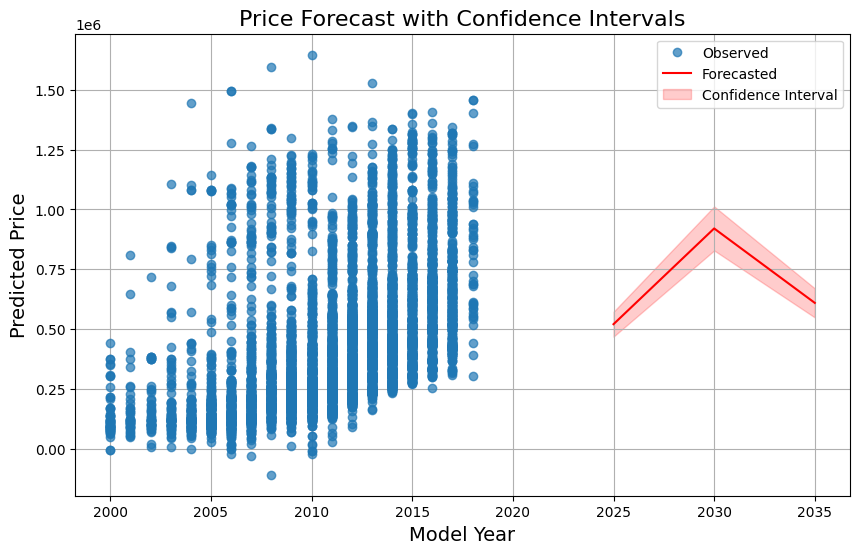

In [ ]:
import numpy as np

# Add prediction intervals
def add_prediction_intervals(predictions, margin=0.10):
    """
    Adds confidence intervals to predictions with a given margin.
    """
    lower_bound = predictions - (predictions * margin)
    upper_bound = predictions + (predictions * margin)
    return lower_bound, upper_bound

# Calculate intervals
forecasted_prices['Lower Bound'], forecasted_prices['Upper Bound'] = add_prediction_intervals(
    forecasted_prices['Forecasted Price']
)

# Visualize with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(aging_cars['modelYear'], aging_cars['predicted_price'], 'o', label='Observed', alpha=0.7)
plt.plot(forecasted_prices['modelYear'], forecasted_prices['Forecasted Price'], 'r-', label='Forecasted')
plt.fill_between(forecasted_prices['modelYear'],
                 forecasted_prices['Lower Bound'],
                 forecasted_prices['Upper Bound'],
                 color='r', alpha=0.2, label='Confidence Interval')
plt.title("Price Forecast with Confidence Intervals", fontsize=16)
plt.xlabel("Model Year", fontsize=14)
plt.ylabel("Predicted Price", fontsize=14)
plt.legend()
plt.grid()
plt.show()


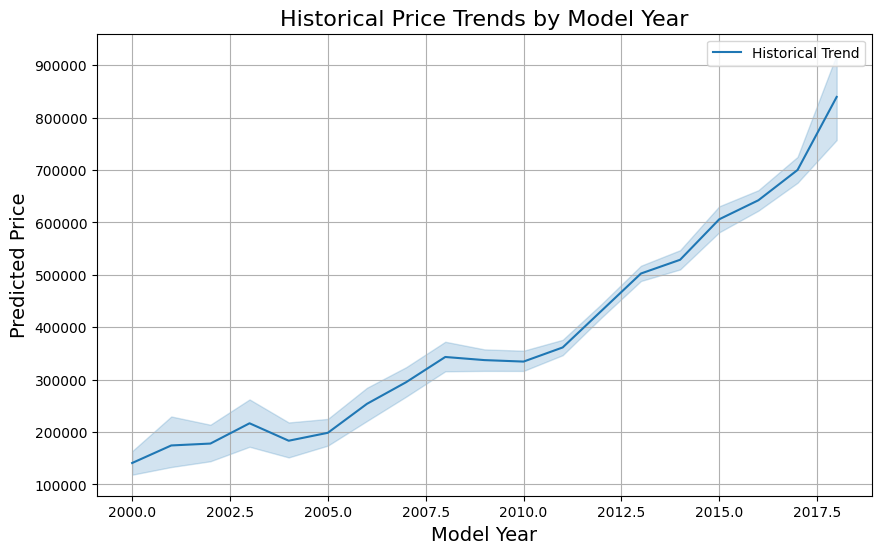

In [ ]:
# Trend analysis for observed data
import seaborn as sns

# Plot historical data trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=aging_cars, x='modelYear', y='predicted_price', label='Historical Trend')
plt.title("Historical Price Trends by Model Year", fontsize=16)
plt.xlabel("Model Year", fontsize=14)
plt.ylabel("Predicted Price", fontsize=14)
plt.legend()
plt.grid()
plt.show()


In [ ]:
print("Best Model:", best_model)


Best Model: GradientBoostingRegressor(learning_rate=0.137575146505522, max_depth=5,
                          min_samples_split=9, n_estimators=279,
                          random_state=42)


In [ ]:
print("Features required by the model:", best_model.feature_names_in_)
print("Columns in the dataset:", aging_cars.columns)


Features required by the model: ['it' 'km' 'ownerNo' ... 'bt_Sedan' 'bt_Wagon' 'transmission_Manual']
Columns in the dataset: Index(['it', 'km', 'ownerNo', 'modelYear', 'centralVariantId', 'price',
       'mileage', 'Seats', 'oem_BMW', 'oem_Chevrolet',
       ...
       'bt_Minivans', 'bt_Pickup Trucks', 'bt_SUV', 'bt_Sedan', 'bt_Wagon',
       'transmission_Manual', 'predicted_price', 'fuelType', 'bodyType',
       'transmission'],
      dtype='object', length=2126)


In [ ]:
missing_features = [feature for feature in best_model.feature_names_in_ if feature not in aging_cars.columns]
for feature in missing_features:
    aging_cars[feature] = 0  # Default value; replace with relevant data if possible


In [ ]:
# Ensure alignment with model features
features_for_prediction = aging_cars[best_model.feature_names_in_]

# Generate predictions
aging_cars['predicted_price'] = best_model.predict(features_for_prediction)

# Verify predictions
print(aging_cars[['modelYear', 'predicted_price']].head())


   modelYear  predicted_price
0       2010    150290.563603
1       2013    537980.446982
2       2013    269845.928681
3       2009    220150.010156
4       2010    529081.494928


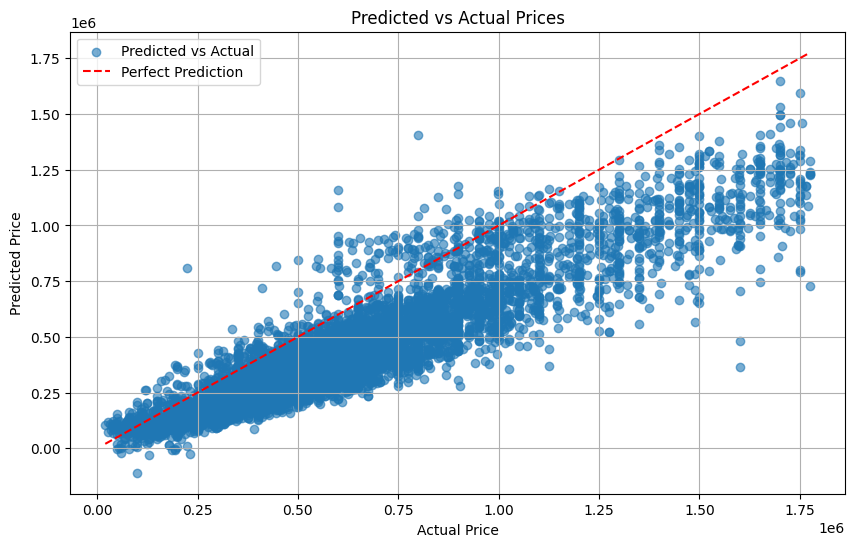

In [ ]:
import matplotlib.pyplot as plt

# Compare predicted and actual prices
plt.figure(figsize=(10, 6))
plt.scatter(aging_cars['price'], aging_cars['predicted_price'], alpha=0.6, label='Predicted vs Actual')
plt.plot([aging_cars['price'].min(), aging_cars['price'].max()],
         [aging_cars['price'].min(), aging_cars['price'].max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid()
plt.show()


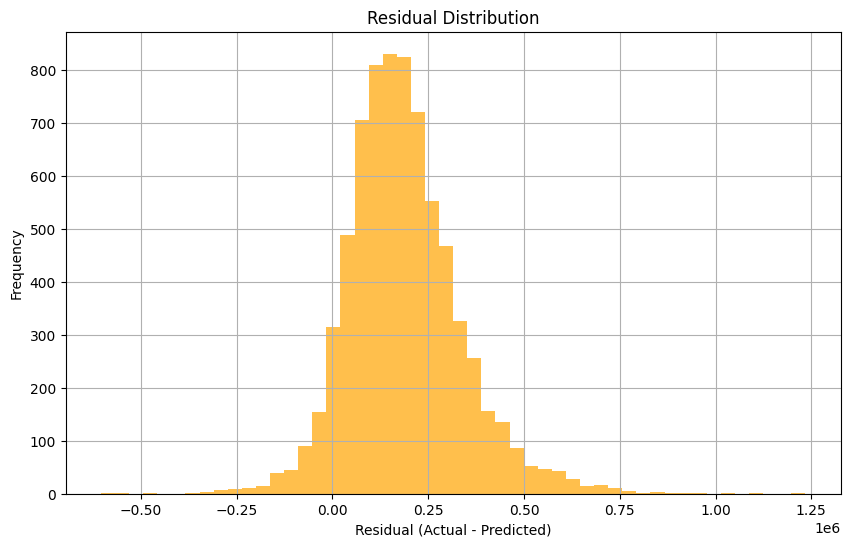

In [ ]:
# Calculate residuals
aging_cars['residuals'] = aging_cars['price'] - aging_cars['predicted_price']

# Plot residuals
plt.figure(figsize=(10, 6))
plt.hist(aging_cars['residuals'], bins=50, color='orange', alpha=0.7)
plt.title('Residual Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid()
plt.show()
